## Car Prices Prediction

#### Problem Statement :
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

#### Business Analytics Goal: 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

#### 1. importing the required libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
carsp = pd.read_csv('carprice.csv')
carsp.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
carsp.shape

(205, 26)

In [4]:
carsp.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Checking For Null Values:

In [5]:
carsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### There are no null values

#### 2. Data Cleaning and Preparation

#### 2.1. Separating The Name "carName" column
as we can see the car names are in a format of "company-name_car-name" in the same column, so let's make them as separate columns as one with the car company and second one being the car's actual model name or number whichever is present.

In [6]:
CompanyName = carsp['CarName'].apply(lambda x : x.split(' ')[0])
carsp.insert(3,"CompanyName",CompanyName)

In [7]:
carsp.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
carsp.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Fixing invalid values
There are some spelling mistakes in the column "CompanyName" 
these are the entries to be fixed:

'maxda' = mazda'
'Nissan' = 'nissan'
'porsche' = 'porcshce'
'toyota' = 'toyouta'
'vokswagen' = 'volkswagen'

In [9]:
carsp.CompanyName = carsp.CompanyName.str.lower()

def replace_name(a,b):
    carsp.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

#### renaming the "CarsName" column to "Model" 
as it clearly represents the model name as well

In [10]:
carsp.rename(columns = {'CarName':'Model'}, inplace = True)

In [11]:
carsp.head()

,car_ID,symboling,Model,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### let's check if there are any duplicates:


In [12]:
carsp.loc[carsp.duplicated()]

,car_ID,symboling,Model,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#### so there are absolutely no duplicates in our data, we are done with the data prep part. So we can move ahead to the next step!

#### 3. Exploratory Data Analysis:

#### 3.1. Let's start our analysis on "categorical variables" first:

#### Checking for Categorical Columns:

In [13]:
carsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   Model             205 non-null    object 
 3   CompanyName       205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   carbody           205 non-null    object 
 8   drivewheel        205 non-null    object 
 9   enginelocation    205 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

#### Let's plot some histograms:

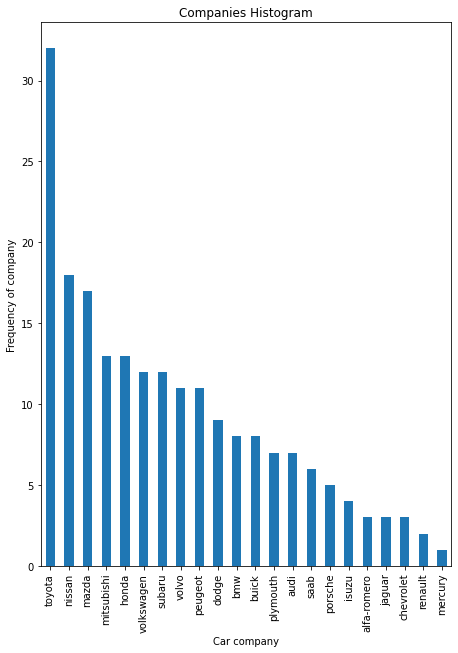

In [14]:
plt.figure(figsize=(25, 10))

plt.subplot(1,3,1)
plt1 = carsp.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')
plt.show()

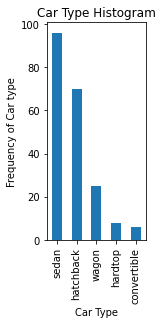

In [15]:
plt.subplot(1,3,3)
plt1 = carsp.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
plt.show()

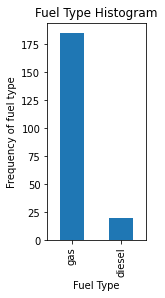

In [16]:
plt.subplot(1,3,2)
plt1 = carsp.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')
plt.show()


#### Insights :

1. "Toyota" is the most trusted car company here.
2. Number of "gas" fueled cars are more than "diesel" fueled cars.
3. "sedan" and "hachback" are prefered more than the rest.

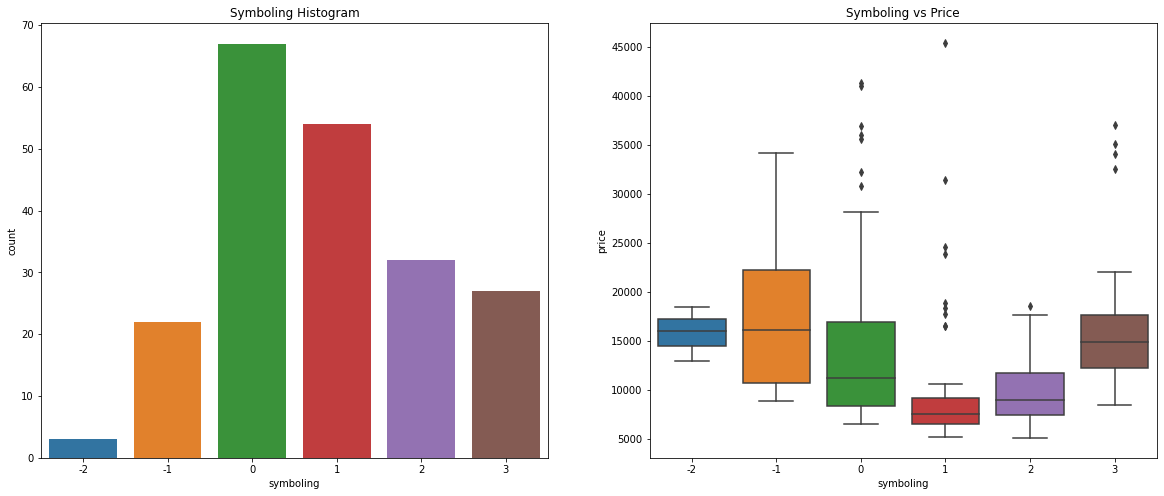

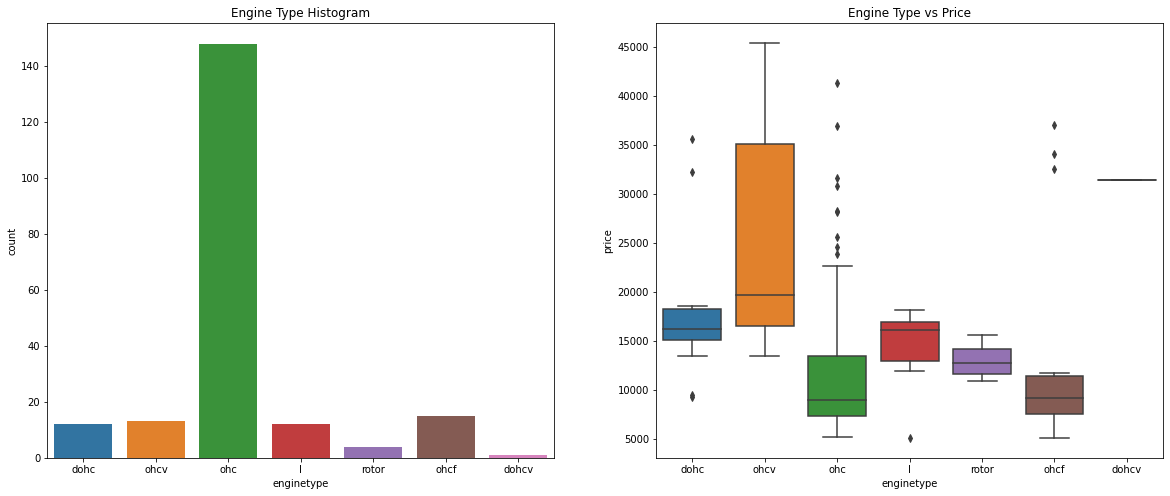

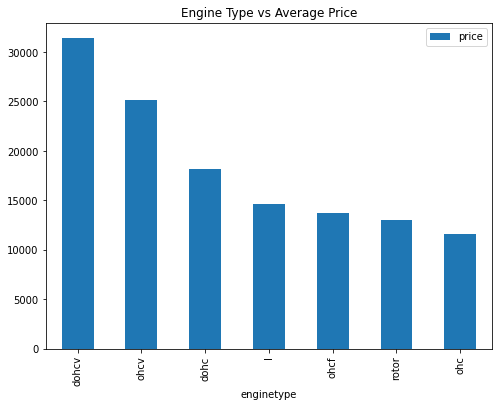

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(carsp.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=carsp.symboling, y=carsp.price)

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(carsp.enginetype)

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=carsp.enginetype, y=carsp.price)


df = pd.DataFrame(carsp.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')

plt.show()

#### Insights :

1. "ohc" Engine type seems to be most bought.
2. "ohcv" has the highest price range.

#### Analysis with Average Price:

<Figure size 1800x432 with 0 Axes>

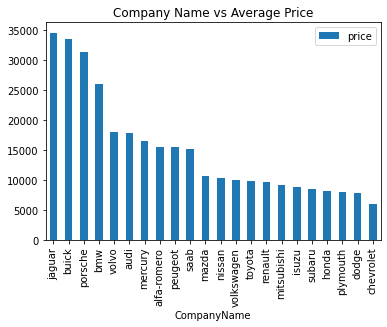

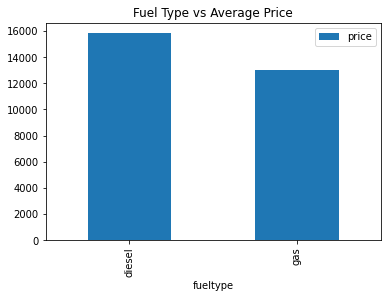

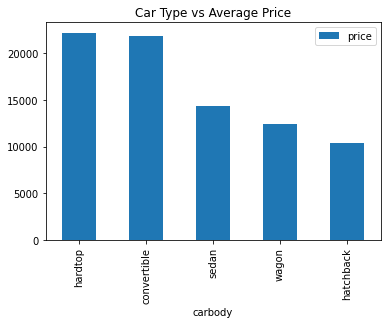

In [18]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(carsp.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(carsp.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(carsp.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Insights :

1. "Jaguar" and "Buick" has the highest average price.
2. "diesel" has higher average price than gas.
3. "hardtop" and "convertible" have higher average price.

#### 3.2. Analysis on "Numerical Variables":

wheelbase           
carlength         
carwidth          
carheight         
curbweight       
enginesize      
boreratio
stroke            
compressionratio 
horsepower        
peakrpm            
citympg            
highwaympg          
price    

Let's plot some scatter plots for these features:


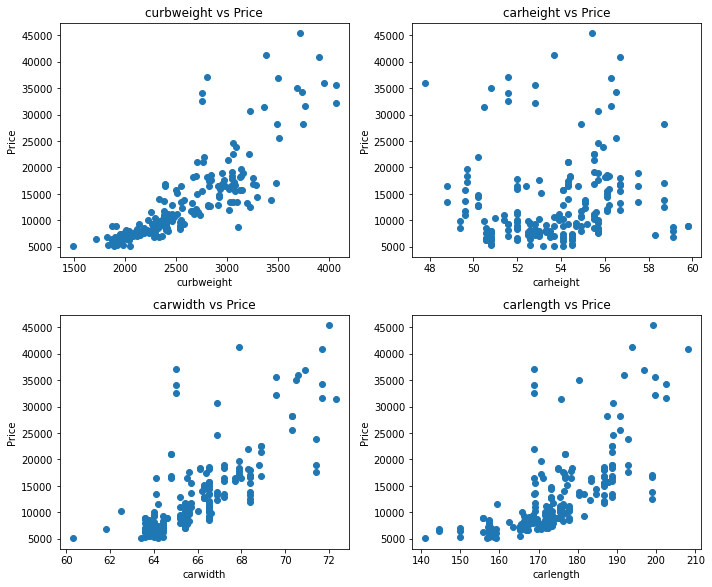

In [19]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(carsp[x],carsp['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('curbweight', 1)
scatter('carheight', 2)
scatter('carwidth', 3)
scatter('carlength', 4)

plt.tight_layout()

#### Insights :

1. "carwidth", "carlength" and "curbweight" have poitive correlations with "price". 
2. "carheight" doesn't have any significance with respect to "price".

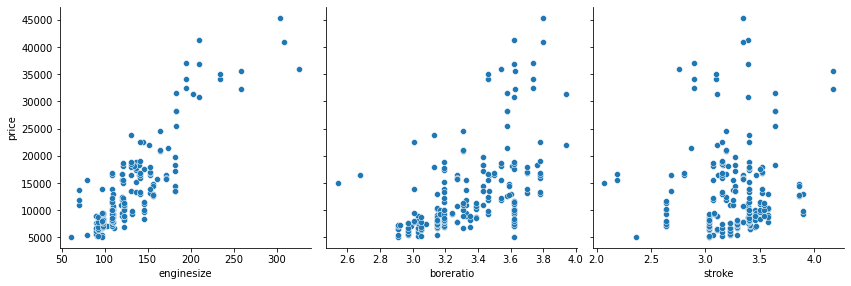

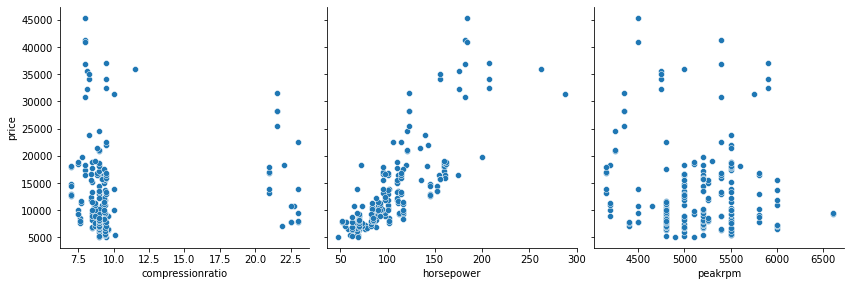

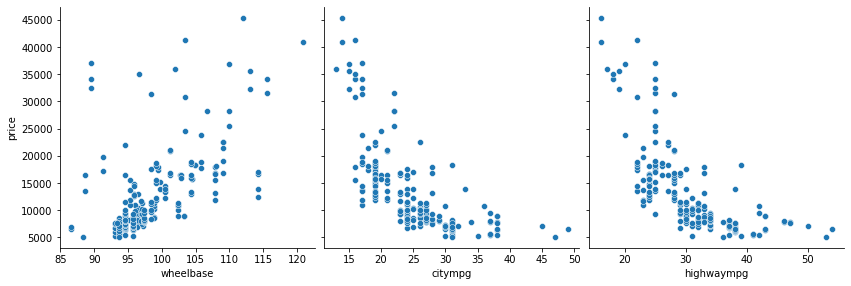

In [20]:
def pp(x,y,z):
    sns.pairplot(carsp, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

#### Inference :

1. "enginesize", "boreratio", "horsepower", "wheelbase" - have significant positive correlations with price.
2. "citympg", "highwaympg" have significant negative correlations with price.

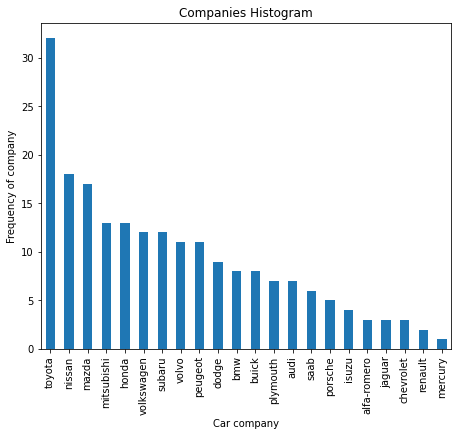

In [21]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = carsp.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')
plt.show()

In [22]:
np.corrcoef(carsp['peakrpm'], carsp['horsepower'])[0, 1]

0.13107250535631124

#### Step 4 : Deriving new features for better model performance:

#### Assigning "Carbody" some scores as it can help as understand what kind of space does the market consumers are buying the most

In [23]:
carsp.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [24]:
carsp['bodyscore'] = carsp['carbody']

In [25]:
dict = {'convertible': 0,'hatchback': 2, 'sedan' :3, 'wagon' :4,'hardtop' :5}

In [26]:
carsp.bodyscore = [dict[item] for item in carsp.bodyscore]

In [27]:
np.corrcoef(carsp['price'], carsp['bodyscore'])[0, 1]

0.1130143728837661

dropping the carbody column as we don't need it anymore

In [28]:
carsp = carsp.drop(columns=['carbody'])

In [29]:
carsp.bodyscore.describe()

count    205.000000
mean       2.770732
std        0.913473
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: bodyscore, dtype: float64

#### Making a new column for fuel economy.

In [30]:
carsp['fueleconomy'] = (0.55 * carsp['citympg']) + (0.45 * carsp['highwaympg'])

#### lets make a new column called ranges where we can assign a group for " average price range" as low, normal and high called "carsrange"

In [31]:
#Binning the Car Companies based on avg prices of each Company.
carsp['price'] = carsp['price'].astype('int')
temp = carsp.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
carsp_bin=['low','normal','high']
carsp['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=carsp_bin)
carsp.head()

,car_ID,symboling,Model,CompanyName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,bodyscore,fueleconomy,carsrange
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495,0,23.70,normal
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500,0,23.70,normal
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500,2,22.15,normal
3,4,2,audi 100 ls,audi,gas,std,four,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950,3,26.70,normal
4,5,2,audi 100ls,audi,gas,std,four,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450,3,19.80,normal


#### So we are done with the EDA and Introduction of new variables, now we can say that: 

#### List of significant variables after Visual analysis :

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Body Score 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [32]:
carsp_sig= carsp[['price', 'fueltype', 'aspiration','bodyscore', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
carsp_sig.head()

,price,fueltype,aspiration,bodyscore,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,0,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,normal
1,16500,gas,std,0,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,normal
2,16500,gas,std,2,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,normal
3,13950,gas,std,3,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,normal
4,17450,gas,std,3,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,normal


#### let's make a pair plot for the following dataframe:

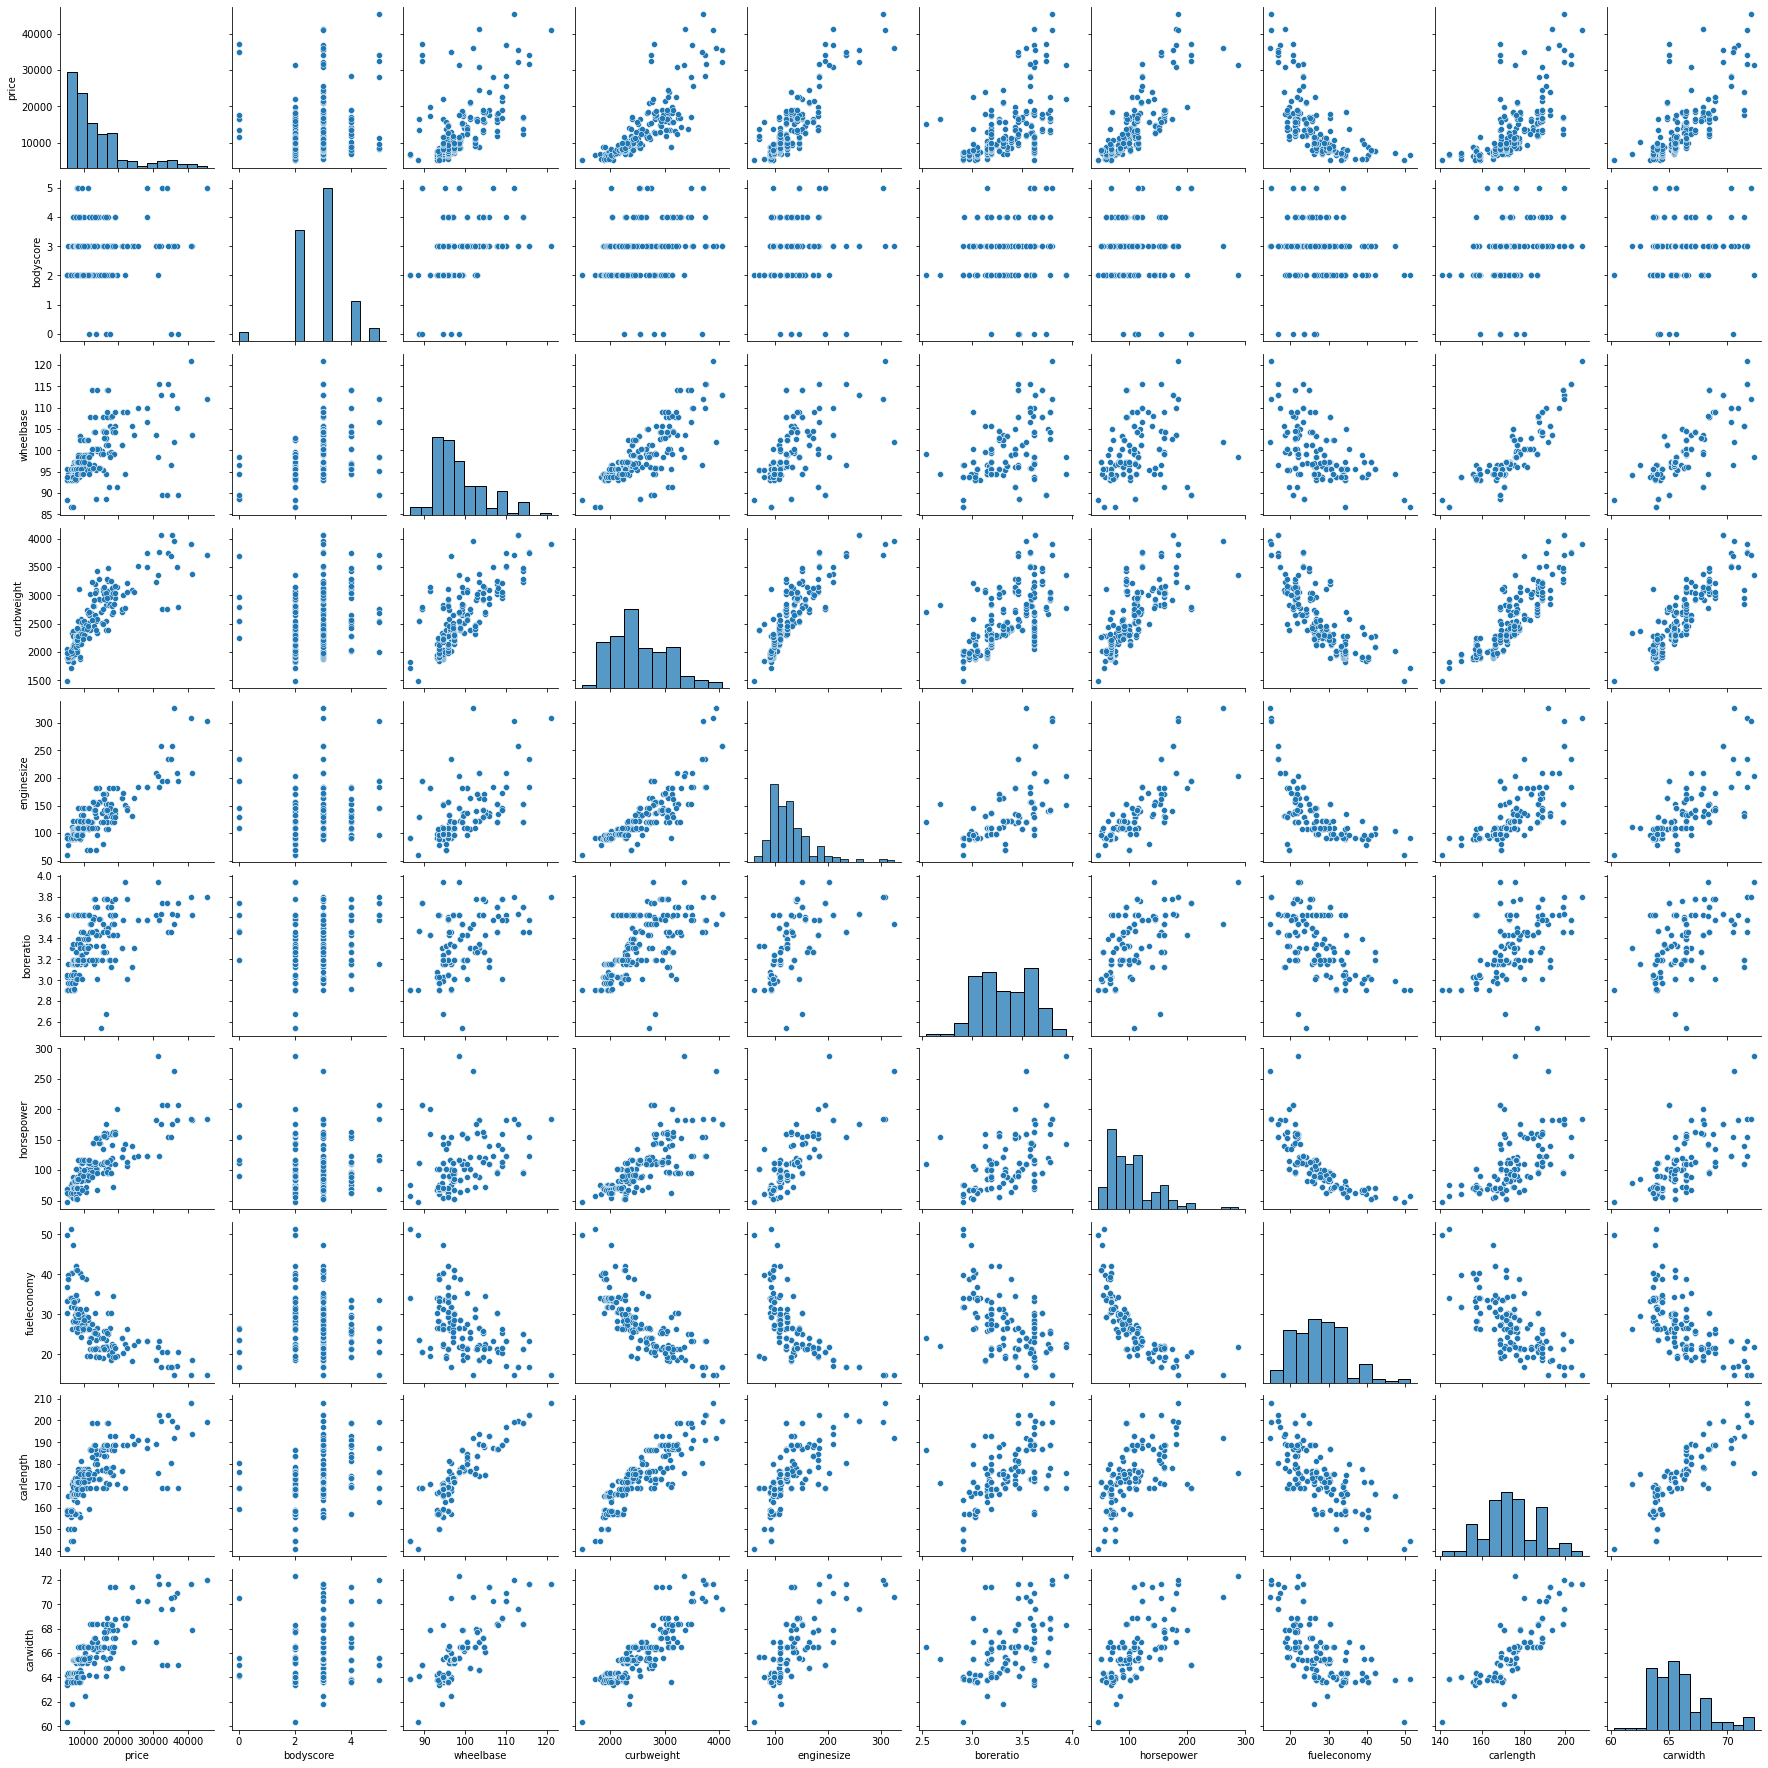

In [33]:
sns.pairplot(carsp_sig)
plt.show()

#### 4. Creating Dummy Variables:

In [34]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

carsp_sig = dummies('fueltype',carsp_sig)
carsp_sig = dummies('aspiration',carsp_sig)
carsp_sig = dummies('bodyscore',carsp_sig)
carsp_sig = dummies('drivewheel',carsp_sig)
carsp_sig = dummies('enginetype',carsp_sig)
carsp_sig = dummies('cylindernumber',carsp_sig)
carsp_sig = dummies('carsrange',carsp_sig)

In [35]:
carsp_sig.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,normal,high
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [36]:
carsp_sig.shape

(205, 31)

#### 5. Creating Test,Train sets with Feature Scaling:

In [37]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(carsp_sig, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,normal,high
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [40]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,normal,high
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Correlation using heatmap


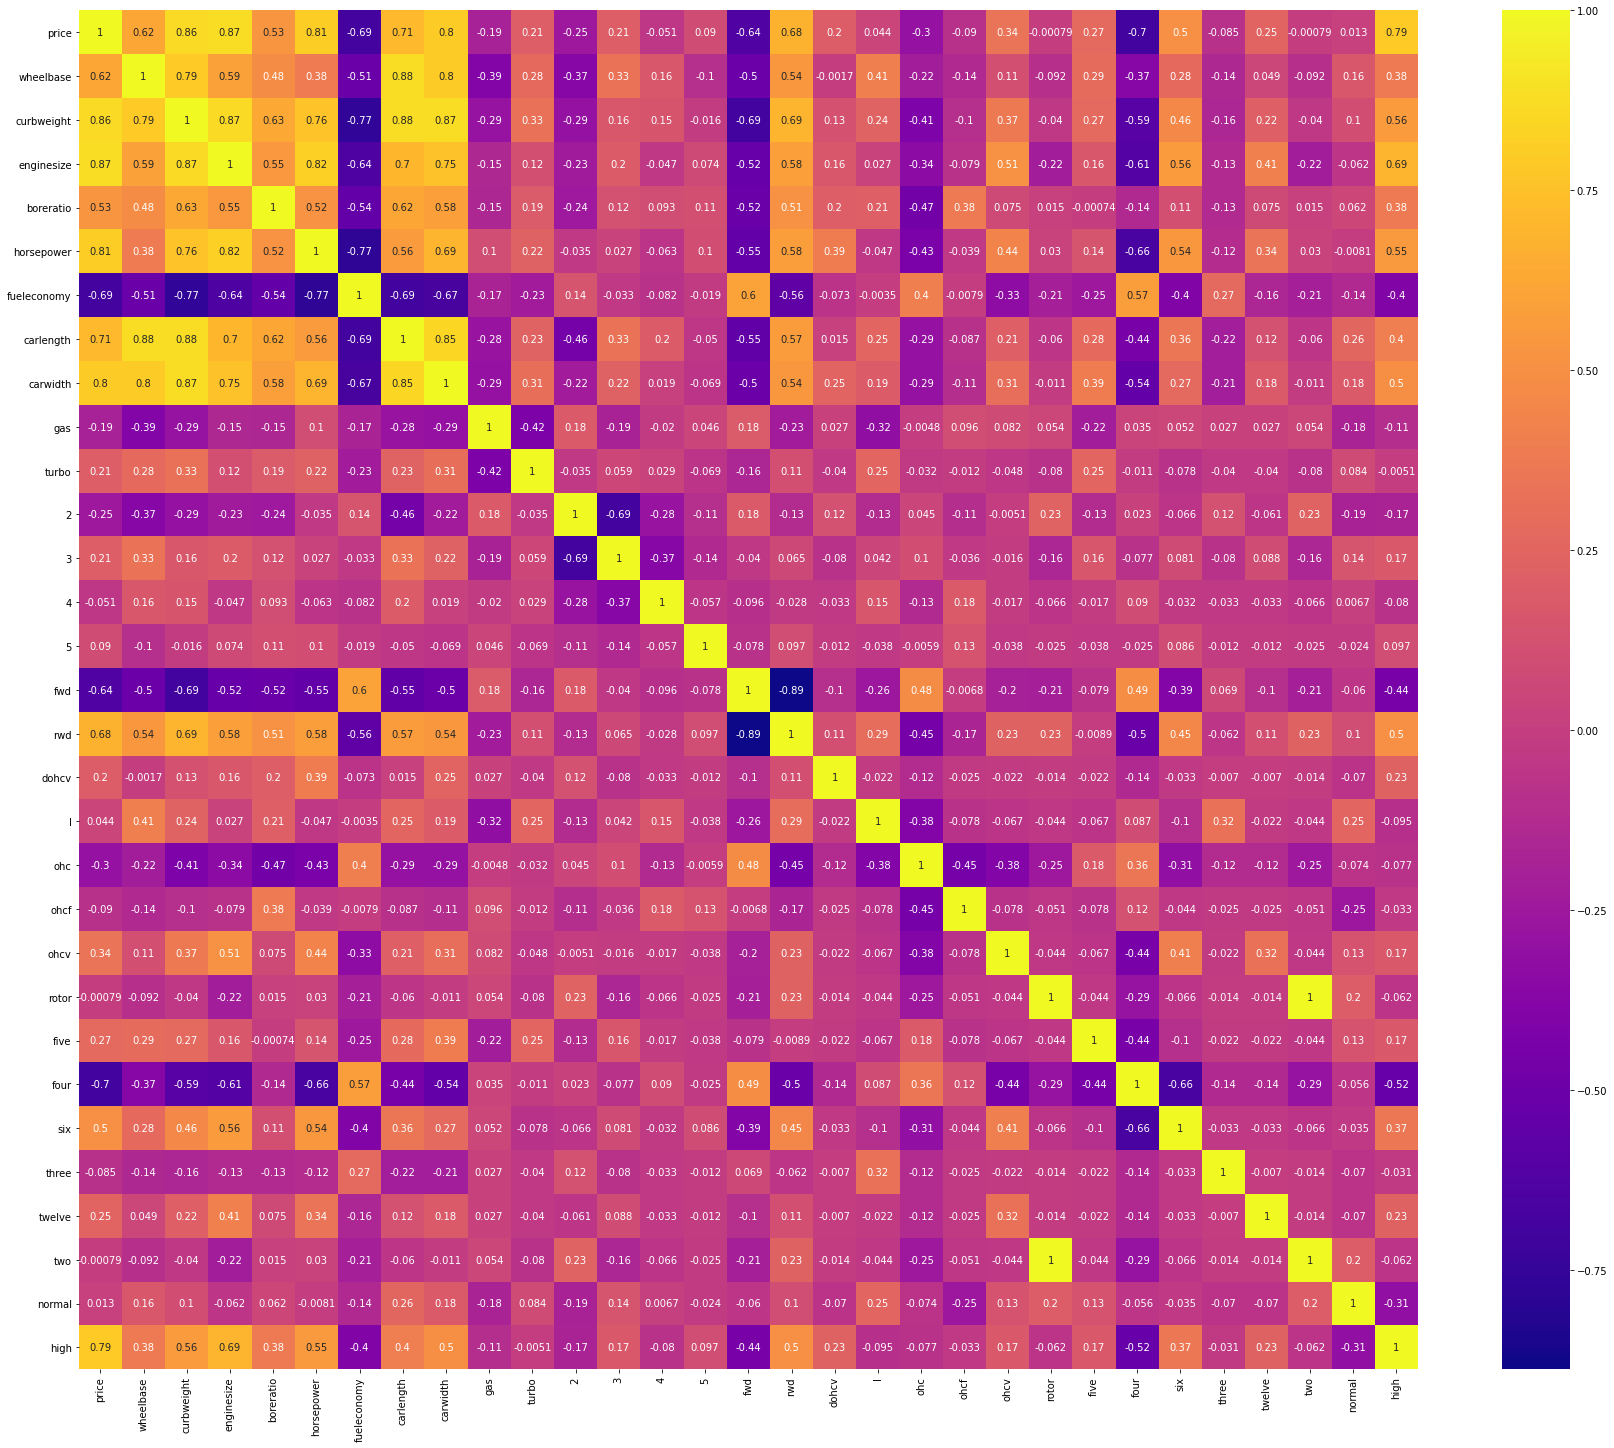

In [41]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="plasma")
plt.show()

#### Highly correlated variables to price are - "curbweight", "enginesize", "horsepower","carwidth" and "highend".

In [42]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

#### Step 8 : Model Building

In [43]:
#For RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 (2, True, 1),
 (3, True, 1),
 (4, True, 1),
 (5, False, 2),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('normal', False, 12),
 ('high', True, 1)]

In [46]:
X_train.columns[rfe.support_]

Index([ 'curbweight',  'horsepower', 'fueleconomy',    'carwidth',
                   2,             3,             4,       'dohcv',
            'twelve',        'high'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [47]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [48]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model-1 

In [49]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.29e-70
Time:                        12:18:05   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

#### p-value of "twelve" is higher than the significance value of 0.05, hence we can drop it as it is insignificant in presence of other variables.

In [50]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

#### Model-2

In [51]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 09 May 2021   Prob (F-statistic):           4.25e-71
Time:                        12:18:05   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

#### p-value of "fueleconomy" is higher than the significance value of 0.05, hence we can drop it as it is insignificant in presence of other variables.

In [52]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### Model-3

In [53]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sun, 09 May 2021   Prob (F-statistic):           7.85e-72
Time:                        12:18:05   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [54]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,3,6.07
4,2,5.63
3,carwidth,5.14
2,horsepower,3.61
6,4,3.58
8,high,1.63
7,dohcv,1.46


#### as "curbweight" is showing high VIF value we can drop it right away. (shows that curbweight has high multicollinearity.)

In [55]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### Model - 4

In [56]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sun, 09 May 2021   Prob (F-statistic):           4.70e-70
Time:                        12:18:05   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [57]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
4,3,6.06
3,2,5.54
5,4,3.47
1,horsepower,2.50
2,carwidth,2.22
7,high,1.56
6,dohcv,1.21


dropping "3" which is for "sedan" because of high VIF value.

In [58]:
X_train_new = X_train_new.drop(3, axis = 1)

#### Model-5

In [59]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.68e-69
Time:                        12:18:05   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

dropping "4" which is for "wagon" because of high p value.

In [60]:
X_train_new = X_train_new.drop(4, axis = 1)

#### Model - 6

In [61]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.57e-70
Time:                        12:18:05   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

#### 9. Residual Analysis of Model

In [62]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

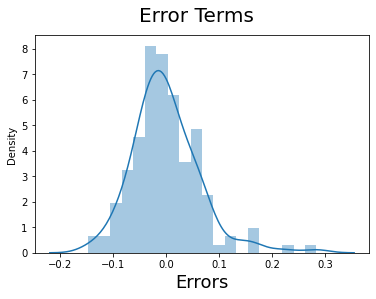

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### 9. Prediction and Evaluation

In [64]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [65]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [66]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [67]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [68]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8146387226353746

Text(0, 0.5, 'y_pred')

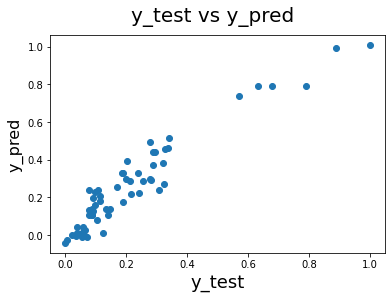

In [69]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)   

In [70]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.57e-70
Time:                        12:18:51   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

Insights:
1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.912 and 0.909 - `92%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 284.8 and 1.57e-70(approx. 0.0) - Model is significant and explained `92%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.